<h2 style="color:green" align="center">Predicting if a person would buy life insurnace based on his age using logistic regression</h2>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


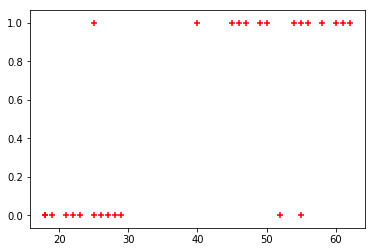

In [ ]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [ ]:
X_test

,age
4,46
8,62
26,23
17,58
24,50
25,54


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
X_test

,age
16,25
21,26
2,47


In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
model.predict_proba(X_test)

array([[0.40569485, 0.59430515],
       [0.26002994, 0.73997006],
       [0.63939494, 0.36060506],
       [0.29321765, 0.70678235],
       [0.36637568, 0.63362432],
       [0.32875922, 0.67124078]])

In [ ]:
model.score(X_test,y_test)

1.0

In [ ]:
y_predicted

array([1, 1, 0, 1, 1, 1], dtype=int64)

In [ ]:
X_test

,age
4,46
8,62
26,23
17,58
24,50
25,54


**model.coef_ indicates value of m in y=m*x + b equation**

In [ ]:
model.coef_

array([[0.04150133]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [ ]:
model.intercept_

array([-1.52726963])

**Lets defined sigmoid function now and do the math with hand**

In [ ]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [ ]:
age = 35
prediction_function(age)

0.4850044983805899

**0.485 is less than 0.5 which means person with 35 age will *not* buy insurance**
**0.485 is more than 0.5 which means person with 43 will buy the insurance**

In [ ]:
age = 43
prediction_function(age)

0.568565299077705

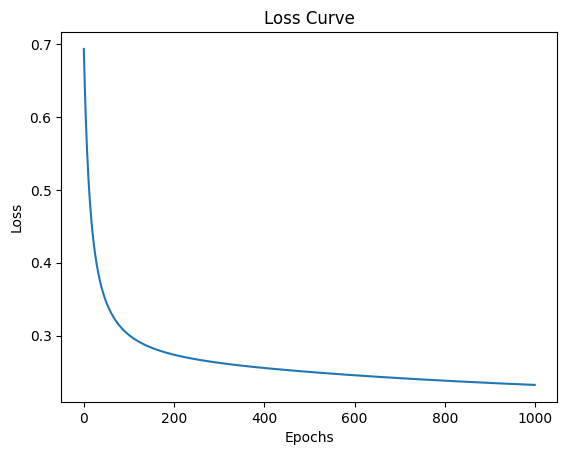

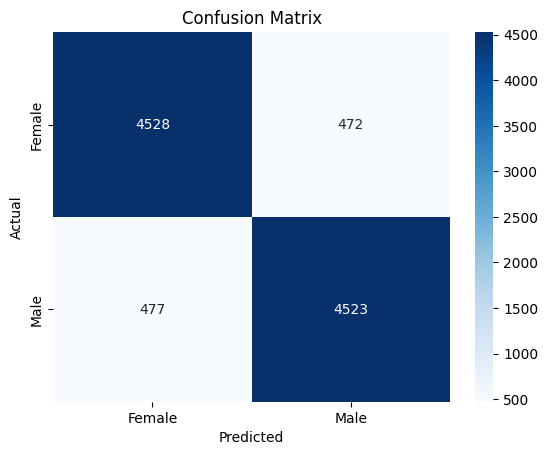

              precision    recall  f1-score   support

      Female       0.90      0.91      0.91      5000
        Male       0.91      0.90      0.91      5000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# ---------------------------
# Step 1: Load dataset
# ---------------------------
df = pd.read_csv("/content/weight-height.csv")

# Encode Gender: Male = 1, Female = 0
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

X = df[['Height', 'Weight']].values
y = df['Gender'].values.reshape(-1, 1)

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add bias term (intercept)
X = np.hstack([np.ones((X.shape[0], 1)), X])  # shape (n, 3)

# ---------------------------
# Step 2: Sigmoid Function
# ---------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# ---------------------------
# Step 3: Loss Function (Binary Cross Entropy)
# ---------------------------
def compute_loss(y, y_pred):
    m = len(y)
    epsilon = 1e-8  # avoid log(0)
    return - (1/m) * np.sum(y * np.log(y_pred + epsilon) + (1-y) * np.log(1 - y_pred + epsilon))

# ---------------------------
# Step 4: Gradient Descent
# ---------------------------
def gradient_descent(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros((n, 1))  # initialize parameters
    loss_history = []

    for _ in range(epochs):
        z = np.dot(X, theta)
        y_pred = sigmoid(z)
        error = y_pred - y

        grad = (1/m) * np.dot(X.T, error)
        theta -= lr * grad

        loss = compute_loss(y, y_pred)
        loss_history.append(loss)

    return theta, loss_history

# ---------------------------
# Step 5: Train Model
# ---------------------------
theta, loss_history = gradient_descent(X, y, lr=0.1, epochs=1000)

# ---------------------------
# Step 6: Predictions
# ---------------------------
y_pred_prob = sigmoid(np.dot(X, theta))
y_pred = (y_pred_prob >= 0.5).astype(int)

# ---------------------------
# Step 7: Plot Loss Curve
# ---------------------------
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

# ---------------------------
# Step 8: Confusion Matrix
# ---------------------------
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Female", "Male"],
            yticklabels=["Female", "Male"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ---------------------------
# Step 9: Classification Report
# ---------------------------
print(classification_report(y, y_pred, target_names=["Female", "Male"]))


<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load your dataset (update the path/filename as needed)
df = pd.read_csv('HR_comma_sep.csv')

# Select input features and target
X = df.drop(['left', 'Department'], axis=1)  # Drop 'left' (target) and 'Department' (categorical, can add later)
X = pd.get_dummies(X, columns=['salary'], drop_first=True) # Convert salary categorical to dummies
y = df['left']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[2120  174]
 [ 498  208]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      2294
           1       0.54      0.29      0.38       706

    accuracy                           0.78      3000
   macro avg       0.68      0.61      0.62      3000
weighted avg       0.75      0.78      0.75      3000

